# 희소행렬
## CountVectorizer를 이용한 피처 벡터화
- 사전 데이터 가공 : 모든 문자를 소문자로 변환하는 등의 사전 작업 수행(lowercase = True)
- 토큰화 : Default는 단어 기준이며, n_gram_range를 반영하여 토큰화 수행
- 텍스트 정규화 : Stop Words 필터링만 수행.(Stemmer, Lemmatize는 CountVectorizer 자체에서는 지원되지 않음. 이를 위한 함수를 만들거나 외부 패키지로 미리 Text Normalization 수행 필요)
- 피처 벡터화 : max_df, min_df, max_features등의 파라미터를 반영하여 Token된 단어들을 feature extraction 후 vectorization 적용

## 희소행렬
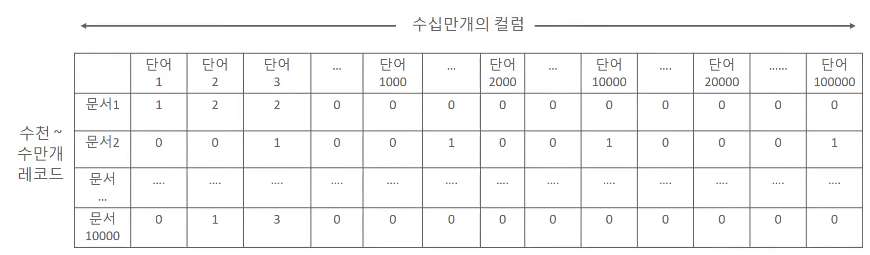
- BOW의 Vectorization 모델은 너무 많은 0값이 메모리 공간에 할당되어 많은 메모리 공간이 필요하며, 연산시에도 데이터 엑세스를 위한 많은 시간이 소모됩니다.

## 희소 행렬의 저장 변환 형식
- COO 형식
    - Coordinate(좌표) 방식을 의미하며 0이 아닌 데이터만 별도의 배열(Array)에 저장하고 그 데이터를 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식입니다.
- CSR 형식
    - COO 형식이 위치 배열값을 중복적으로 가지는 문제를 해결한 방식. 일반적으로 CSR형식이 COO 보다 많이 사용됩니다.
- 파이썬에서는 희소 행렬을 COO, CSR 형식으로 변환하기 위해서 Scipy의 coo_matrix(), csr_matrix() 함수를 이용합니다.

## COO 형식
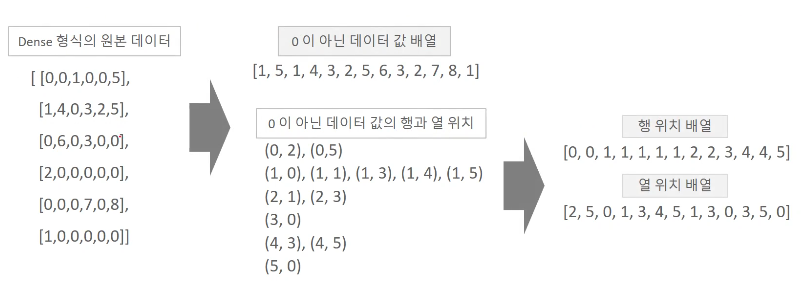

## CSR 형식
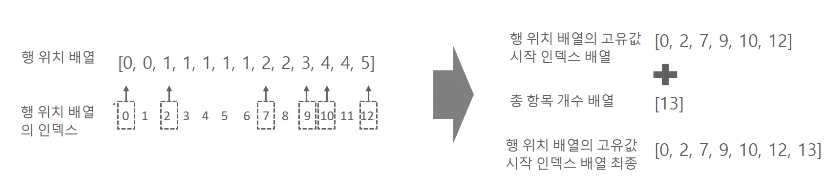

# 실습

### 희소 행렬 - COO 형식

In [1]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], 
                    [0, 2, 0 ] ] )

In [2]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [3]:
print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'scipy.sparse._coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


### 희소 행렬 – CSR 형식

In [4]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())


COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [5]:
print(sparse_csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [6]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [8]:
print(coo)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [9]:
print(csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
